<a href="https://colab.research.google.com/github/nikhilsharma270027/ML-Project-learning/blob/main/Project_2_Loan_Status_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm # support vector model
from sklearn.metrics import accuracy_score

## Data Collection And Pr0cessing

In [ ]:
# loading the dataset to pandas dataFrame
loandataset = pd.read_csv("/content/loanpredictionproject.csv");
type(loandataset)

pandas.core.frame.DataFrame

In [ ]:
loandataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
## checking the shape of the dataset like row and colum
loandataset.shape

(614, 13)

In [ ]:
# statistical metrics
loandataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# find number of missing values in my dataset
loandataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# after dropping the missing values from my dataset
loandataset = loandataset.dropna()

In [ ]:
loandataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
loandataset['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [ ]:
# label encoding
loandataset.replace({"Loan_Status": {'N': 0, 'Y': 1}},inplace=True); # using pandas method
# i will convert yes and no to binary yes: 1  and   NO: 0
loandataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#
loandataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
# will chnage 3+ to 4
loandataset = loandataset.replace(to_replace='3+' , value=4);

In [ ]:
loandataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


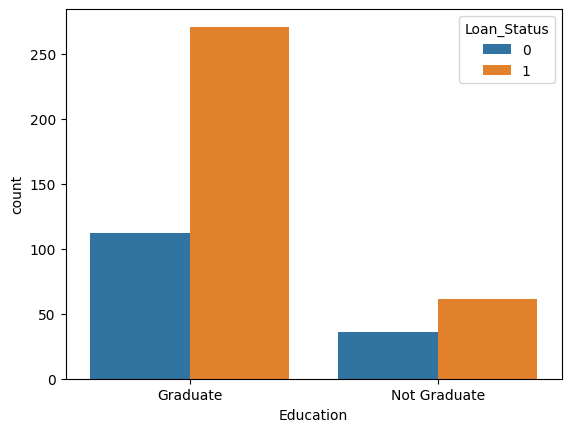

In [ ]:
# education andn loan Status
sns.countplot(x='Education', hue='Loan_Status',data=loandataset);
# approbved orange
# not approved blue

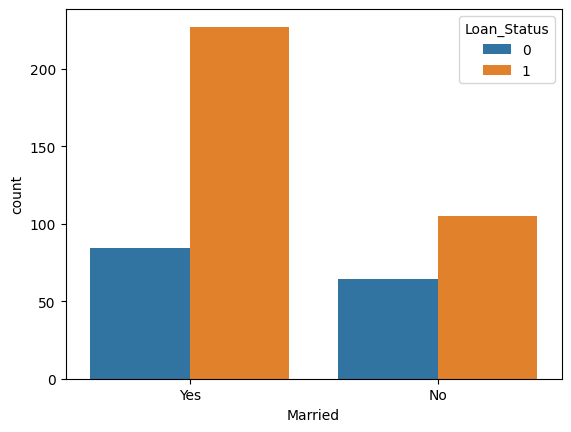

In [ ]:
# marital status and loan status
sns.countplot(x='Married', hue='Loan_Status',data=loandataset);

In [ ]:
#  converting catgorical colums to numerical values
loandataset.replace({'Married':{'No':0,'Yes':1},
                     'Gender':{'Male':1,'Female':0},
                     'Self_Employed': {'No': 0, "Yes": 1},
                     'Property_Area': {'Rural': 0, 'Semiurban': 1,'Urban': 2},
                     'Education': {'Graduate': 1, 'Not Graduate': 0}},inplace=True);
loandataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# now we have amke all colums in numerical data
# separating the data and label
X = loandataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1) # removing entrie colums
Y = loandataset['Loan_Status']

print(X)
print("--------------------------------------")
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
# training and trsing a model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
# Training the model svm
classifier = svm.SVC(kernel='linear');
# now traing the svm
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model evaluation

In [ ]:
# lets evaluate the accuracy
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) # compare predicted with y_train
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7986111111111112


In [ ]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test) # compare predicted with y_train
print('Accuracy on training data : ', testing_data_accuracy)

Accuracy on training data :  0.8333333333333334


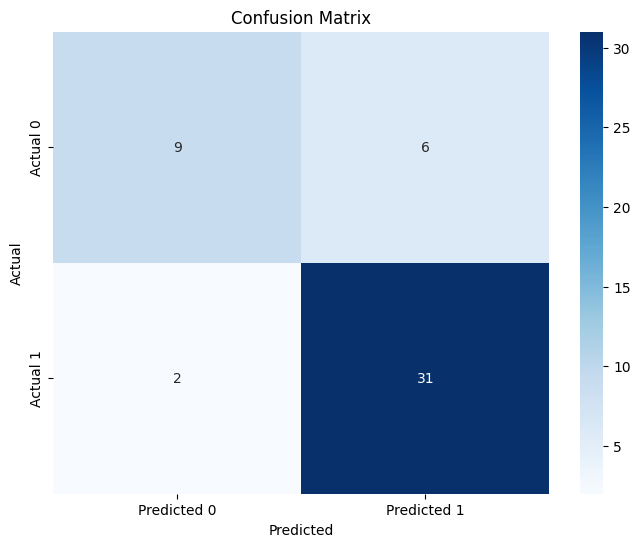

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming X_test and Y_test are already defined from your previous code

# Predict on the test set
X_test_prediction = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
